## Chapter 6: Elman Neural Networks

Elman neural networks are a popular **partially recurrent
neural network.** They were initially designed to learn
sequential or time-varying patterns.

They are composed of an 
- input layer
- a context layer (also called a recurrent or delay layer)
- a hidden layer,
- and an output layer

Each layer contains one or more neurons
which propagate information from one layer to another by computing
a nonlinear function of their weighted sum of inputs

In an Elman neural network the number of neurons in the
context layer is equal to the number of neurons in the hidden
layer. In addition, the context layer neurons are fully connected
to all the neurons in the hidden layer.

The great thing about neural networks is that
you **do not need to specify the exact nature of the relationship
(linear, non-linear, seasonality,trend) that exists between the
input and output.** The hidden layers of a deep neural network
(DNN) remove the need to prespecify the nature of the data
generating mechanism. This is because they can approximate
extremely complex decision functions.

In [10]:
import pandas as pd
import numpy as np

from sklearn import preprocessing

from pyneurgen.neuralnet import NeuralNet
from pyneurgen.recurrent import ElmanSimpleRecurrent

import matplotlib.pyplot as plt
from pylab import plot, legend, subplot

import random

In [2]:
loc = "COE.csv"
temp = pd.read_csv(loc)

data = temp.drop(temp.columns[[0,1]], axis = 1)
y= data['COE$']

x = data.drop(data.columns[[0,4]], axis = 1)
x =x.apply(np.log)
x = pd.concat([x, data['Open?']], axis = 1)


scaler_x = preprocessing. MinMaxScaler(feature_range=(0,1))
x = np.array(x).reshape((len(x),4))
x = scaler_x.fit_transform(x)


scaler_y = preprocessing. MinMaxScaler(feature_range=(0,1))
y = np.array(y).reshape((len(y),1))
y = np.log(y)
y = scaler_y.fit_transform(y)

x = x.tolist()
y = y.tolist()

In the below code the sigmoid activation function is used for
the hidden nodes with the learning rate set to 5%. 

That means
that 5% of the error between each instance of target and output
will be communicated back down the network during training.

In [4]:
random.seed(2016)

fit1 =NeuralNet()

input_nodes= 4
hidden_nodes = 7
output_nodes= 1

fit1.init_layers(input_nodes, [hidden_nodes], output_nodes, ElmanSimpleRecurrent())
fit1.randomize_network()
fit1.layers[1].set_activation_type('sigmoid')
fit1.set_learnrate(0.05)

fit1.set_all_inputs(x)
fit1.set_all_targets(y)

In [8]:
length = len(x)
# The train set contains approximately 95% of the samples.
learn_end_point = int(length * 0.95)

fit1.set_learn_range(0, learn_end_point)
fit1.set_test_range(learn_end_point + 1, length - 1)
fit1.learn(epochs=100, show_epoch_results=True, random_testing=False)

epoch: 0 MSE: 0.00573194277475706
epoch: 1 MSE: 0.0019729435349669674
epoch: 2 MSE: 0.0019074680216713635
epoch: 3 MSE: 0.001846417501070099
epoch: 4 MSE: 0.0017892591217795184
epoch: 5 MSE: 0.0017355492254891231
epoch: 6 MSE: 0.0016849166543919014
epoch: 7 MSE: 0.0016370495060064074
epoch: 8 MSE: 0.0015916845350384433
epoch: 9 MSE: 0.0015485986075628073
epoch: 10 MSE: 0.001507601761509562
epoch: 11 MSE: 0.0014685315359617831
epoch: 12 MSE: 0.0014312483116449926
epoch: 13 MSE: 0.0013956314642426455
epoch: 14 MSE: 0.001361576176459665
epoch: 15 MSE: 0.0013289907880949241
epoch: 16 MSE: 0.001297794588656569
epoch: 17 MSE: 0.0012679159763469676
epoch: 18 MSE: 0.0012392909220780113
epoch: 19 MSE: 0.0012118616886689804
epoch: 20 MSE: 0.001185575764353178
epoch: 21 MSE: 0.0011603849767882599
epoch: 22 MSE: 0.0011362447593853452
epoch: 23 MSE: 0.0011131135462850849
epoch: 24 MSE: 0.0010909522759712197
epoch: 25 MSE: 0.0010697239865164047
epoch: 26 MSE: 0.001049393487946552
epoch: 27 MSE: 0.00

Text(0.5, 1.0, 'Mean Squared Error by Epoch')

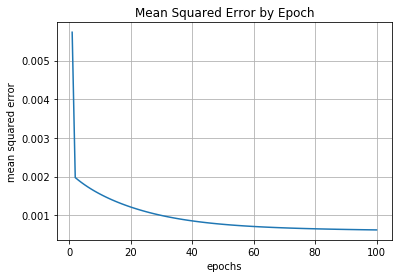

In [11]:
plt.plot(range(1, len(fit1.accum_mse) + 1, 1), fit1.accum_mse)
plt.xlabel('epochs')
plt.ylabel('mean squared error')
plt.grid(True)
plt.title("Mean Squared Error by Epoch")

In [12]:
# test set performance is obtained using the test() function:
mse = fit1.test()
print( "test set MSE = ", np.round(mse, 6))

test set MSE =  0.000118


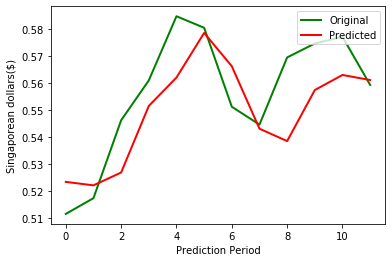

In [13]:
x_values = np.arange(12)
all_targets1 = [item[0][0] for item in fit1.test_targets_activations]
allactuals = [item[1][0] for item in fit1.test_targets_activations]

plt.plot(x_values, all_targets1, 'g-', linewidth=2, markersize=12)
plt.plot(x_values,allactuals, 'r-', linewidth=2, markersize=12)
plt.xlabel('Prediction Period')
plt.ylabel('Singaporean dollars($)')
plt.legend(('Original', 'Predicted'),loc='upper right')

## Additional Resources

- Book : https://www.intechopen.com/books/recurrent_neural_networks

- Sundaram, N. Mohana, S. N. Sivanandam, and R. Subha.
"Elman Neural Network Mortality Predictor for Prediction
of Mortality Due to Pollution." International Journal
of Applied Engineering Research 11.3 (2016): 1835-1840.
- Wysocki, Antoni, and Maciej Ławrynczuk. "Elman neural
network for modeling and predictive control of delayed
dynamic systems." Archives of Control Sciences 26.1
(2016): 117-142.
- Tan, Chao, et al. "A pressure control method for emulsion
pump station based on elman neural network." Computational
intelligence and neuroscience 2015 (2015): 29.
- Liu, Hongmei, Jing Wang, and Chen Lu. "Rolling bearing
fault detection based on the teager energy operator
and elman neural network." Mathematical problems in
engineering 2013 (2013).
94